In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from broom import Broom

In [3]:
broom = Broom(csv_directory = 'resources')
raw_data = broom.data_all_years()
raw_data

,tm,r_per_g,r,ra_per_g,r.1,year
0,ARI,4.64,752.0,5.49,890.0,2016
1,ATL,4.03,649.0,4.84,779.0,2016
2,BAL,4.59,744.0,4.41,715.0,2016
3,BOS,5.42,878.0,4.28,694.0,2016
4,CHC,4.99,808.0,3.43,556.0,2016
...,...,...,...,...,...,...
25,STL,4.70,761.0,4.35,705.0,2017
26,TBR,4.28,694.0,4.35,704.0,2017
27,TEX,4.93,799.0,5.04,816.0,2017
28,TOR,4.28,693.0,4.84,784.0,2017


# These DFs are very good -- I'm gonna make some visuals with them. 

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 29
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tm        150 non-null    object 
 1   r_per_g   150 non-null    float64
 2   r         150 non-null    float64
 3   ra_per_g  150 non-null    float64
 4   r.1       150 non-null    float64
 5   year      150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [31]:
raw_data.groupby('year').apply(lambda year: year.r.describe())


r,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,30.0,724.800000,59.782595,610.0,676.25,723.0,762.00,878.0
2017,30.0,752.733333,65.195691,604.0,707.00,746.5,808.75,896.0
2018,30.0,721.000000,75.026892,589.0,676.25,718.5,768.50,876.0
2019,30.0,782.233333,90.021332,582.0,726.75,769.0,842.50,943.0
2020,30.0,278.133333,32.593350,219.0,250.25,274.5,297.75,349.0


In [8]:
raw_data.groupby('tm').apply(lambda team: team.r.describe())

r,count,mean,std,min,25%,50%,75%,max
tm,,,,,,,,
ARI,5.0,667.8,228.387171,269.0,693.0,752.0,812.0,813.0
ATL,5.0,668.6,193.717062,348.0,649.0,732.0,759.0,855.0
BAL,5.0,622.4,201.294063,274.0,622.0,729.0,743.0,744.0
BOS,5.0,746.4,257.868765,292.0,785.0,876.0,878.0,901.0
CHC,5.0,694.0,240.992738,265.0,761.0,808.0,814.0,822.0
CHW,5.0,612.4,172.553760,306.0,656.0,686.0,706.0,708.0
CIN,5.0,621.8,212.928861,243.0,696.0,701.0,716.0,753.0
CLE,5.0,686.0,245.897336,248.0,769.0,777.0,818.0,818.0
COL,5.0,711.8,245.435735,275.0,780.0,824.0,835.0,845.0


In [ ]:
# Commenting Out for Cosmetic Purposes:

#fig, ax = plt.subplots()
#ax.hist(raw_data.R, raw_data.year)
#plt.show();

In [6]:
# Connect Each CSV to its Own DF
# Ultimately, we only need Runs Scored and Runs allowed. 

csvs = []

a_16 = os.path.join("Resources", "2016_team_data.csv")
a_17 = os.path.join("Resources", "2017_team_data.csv")
a_18 = os.path.join("Resources", "2018_team_data.csv")
a_19 = os.path.join("Resources", "2019_team_data.csv")
a_20 = os.path.join("Resources", "2020_team_data.csv")

# Convert CSVs into DFs

df_16 = pd.read_csv(a_16)
df_17 = pd.read_csv(a_17)
df_18 = pd.read_csv(a_18)
df_19 = pd.read_csv(a_19)
df_20 = pd.read_csv(a_20)

# Pull Necessary Datapoints
# Note that Runs Scored, = "R" Runs Allowed = "R.1"
# Also note that we had to create an adjusted number for 2020 based upon the shortened season

runs_16 = df_16[['Tm','R','R.1']].dropna()
runs_17 = df_17[['Tm','R','R.1']].dropna()
runs_18 = df_18[['Tm','R','R.1']].dropna()
runs_19 = df_19[['Tm','R','R.1']].dropna()
runs_20 = df_20[['Tm','Adj. Runs','Adj. Runs.1']].dropna()

# Now We Can Merge This into one big Dataframe
# The names of the new columns will be a mess, so we will have to fix this.

first_merge = pd.merge(runs_16, runs_17, how='left', on=['Tm'])

second_merge = pd.merge(first_merge, runs_18, how='left', on = ['Tm'])

third_merge = pd.merge(second_merge, runs_19, how='left', on = ['Tm'])

df = pd.merge(third_merge, runs_20, how='left', on = ['Tm'])

# Change the names of the Columns

df.columns= ['Tm','RS 2016', 'RA 2016','RS 2017', 'RA 2017','RS 2018', 'RA 2018','RS 2019', 'RA 2019','RS 2020', 'RA 2020']

# Export into New CSV

# We don't need to run the function below again (df.to_csv), as the CSV is already in the resources folder.
# We will keep it here for the sake of understanding the project
#df.to_csv("run_data")

df.head()

,Tm,RS 2016,RA 2016,RS 2017,RA 2017,RS 2018,RA 2018,RS 2019,RA 2019,RS 2020,RA 2020
0,ARI,752.0,890.0,812.0,659.0,693.0,644.0,813,743,725.76,797.04
1,ATL,649.0,779.0,732.0,821.0,759.0,657.0,855,743,939.60,777.60
2,BAL,744.0,715.0,743.0,841.0,622.0,892.0,729,981,740.34,793.80
3,BOS,878.0,694.0,785.0,668.0,876.0,647.0,901,828,788.94,947.70
4,CHC,808.0,556.0,822.0,695.0,761.0,645.0,814,717,716.04,648.00


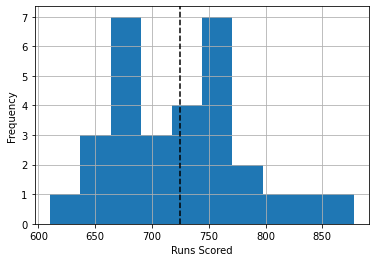

In [34]:
# Plot Annual Histograms

_16_rs = df['RS 2016'].hist(bins=10)
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.axvline((df['RS 2016'].mean()),color='k',linestyle='dashed')
plt.show()

# why don't we make a function for pythagorean win % ? seems like it's worth it 

# ^ That sounds good. What do you think?

In [7]:
# Create New Table with Annual Pythagorean Win %
# Recall that this function is equal to:
# (Runs Scored ^ 1.83) / ((Runs Score ^ 1.83) + (Runs Allowed ^ 1.83))

pyth_16 = (df['RS 2016']**1.83) / ((df['RS 2016']**1.83)+(df['RA 2016']**1.83))

pyth_17 = (df['RS 2017']**1.83) / ((df['RS 2017']**1.83)+(df['RA 2017']**1.83))

pyth_18 = (df['RS 2018']**1.83) / ((df['RS 2018']**1.83)+(df['RA 2018']**1.83))

pyth_19 = (df['RS 2019']**1.83) / ((df['RS 2019']**1.83)+(df['RA 2019']**1.83))

pyth_20 = (df['RS 2020']**1.83) / ((df['RS 2020']**1.83)+(df['RA 2020']**1.83))

pyth_df = pd.DataFrame({
    
        "Teams": df['Tm'],
        "Implied Win % (2016)": pyth_16,
        "Implied Win % (2017)": pyth_17,
        "Implied Win % (2018)": pyth_18,
        "Implied Win % (2019)": pyth_19,
        "Implied Win % (2020)": pyth_20})

pyth_df.set_index("Teams", inplace = True)
pyth_df.head()


#pyth_df.to_csv("pythag_win_percentage") --> Read Above on why this is commented out! 
#                                             CC: Export into new CSV

,Implied Win % (2016),Implied Win % (2017),Implied Win % (2018),Implied Win % (2019),Implied Win % (2020)
Teams,,,,,
ARI,0.423523,0.594370,0.533499,0.541098,0.457244
ATL,0.417239,0.447697,0.565644,0.563884,0.585723
BAL,0.518181,0.443559,0.340793,0.367415,0.468145
BOS,0.605962,0.573306,0.635185,0.538578,0.416897
CHC,0.664640,0.576184,0.575090,0.557790,0.545553


# thoughts on these? 
* https://github.com/roclark/sportsipy --- # Let me try messing around with this one.
* https://pypi.org/project/sportsreference/ 

In [ ]:
# In this API Call, we are looking to get a few things, if possible.
# First and foremost, we are looking for a real-time number (or as recent as possible)
# --- of Runs Scored and Runs Allowed per team. We will use these datapoints to
# ------ calculate the current season (2021) projected wins from an implied pythagorean win %
# ----------------------------------
# Besides that, we should call an API on historical win totals. We should calculate a figure
# --- from the implied win % database that outputs an implied win total (Pythag Wins) and
# ------ compare it versus the actual number. 
# ----------------------------------
# Finally, we will need to call an API for Historical Vegas win Totals
# We will compare all of the above to the vegas win totals.

In [ ]:
# Import Requests for API Call
import requests
import json

In [29]:
# Using roclark's SportsIPY:
# This is all just playing around with it.

#pip install sportsipy
from sportsipy.mlb.teams import Teams 

teams = Teams()

rays = teams('TBR')

rays

print(f'The Rays have scored {rays.total_runs} runs and have allowed {rays.runs_against} runs per game this season.')


# For some reason, there is no total runs against metric through this API. 
# That is a shame, because I loved this API'
# What we can do, however...

The Rays have scored 86 runs and have allowed 4.9 runs per game this season.


In [26]:
# Pythag Win % = Runs Scored ^ 1.83 / [Run Differential^2]

rays_rd = rays.run_difference

rays_rd

# Never mind That doesn't make any sense.

-0.2